# Tensorboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
loss = pd.read_csv(str(Path.home()) + "/data/plots/IMU_general_20190131_132417/run_IMU_general_20190131_132417-tag-euc.csv", ",")
val_loss = pd.read_csv(str(Path.home()) + "/data/plots/IMU_general_20190131_132417/run_IMU_general_20190131_132417-tag-val_euc.csv", ",")

In [3]:
loss.columns

Index(['Wall time', 'Step', 'Value'], dtype='object')

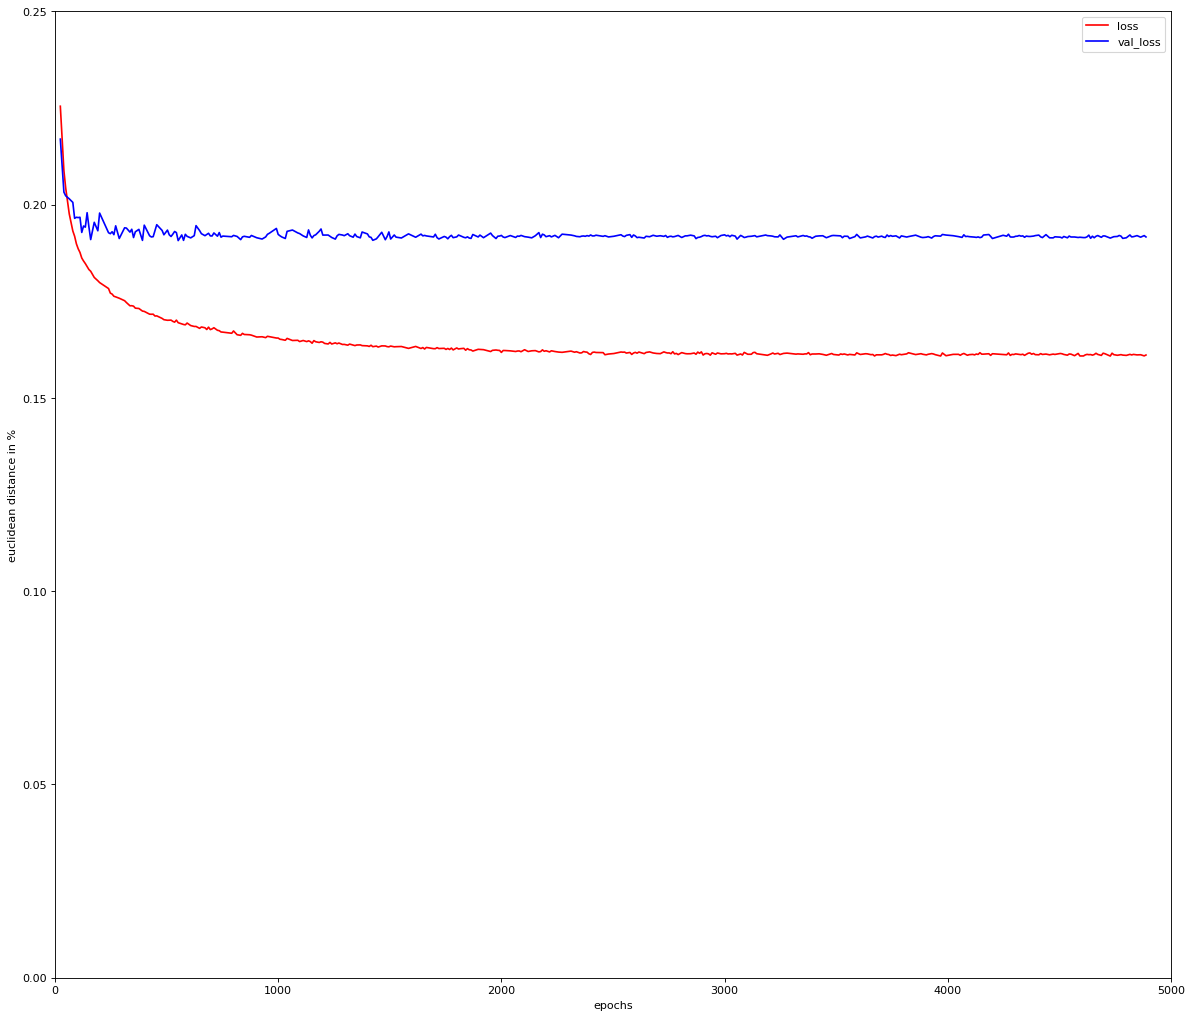

In [9]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(8 * loss['Step'][0:400], loss['Value'][0:400], color='red', label='euc')
plt.plot(8 * val_loss['Step'][0:400], val_loss['Value'][0:400], color='blue', label='val_euc')

plt.legend(('loss', 'val_loss'), loc='upper right')
plt.xlabel("epochs")
plt.ylabel("euclidean distance in %")

plt.xlim(0, 5000)
plt.ylim(0, 0.25)

plt.savefig(str(Path.home()) + "/data/plots/IMU_general_20190131_132417/IMU_general_20190131_132417.png", bbox_inces='tight')
plt.show()

# Telegram (old)

In [1]:
models = ["IMU_N5X_20190122_192853", "IMU_N6_20190122_192939", "IMU_S3Mini_20190122_192551", "IMU_S4_20190122_192806"]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
from scipy.interpolate import spline
import os

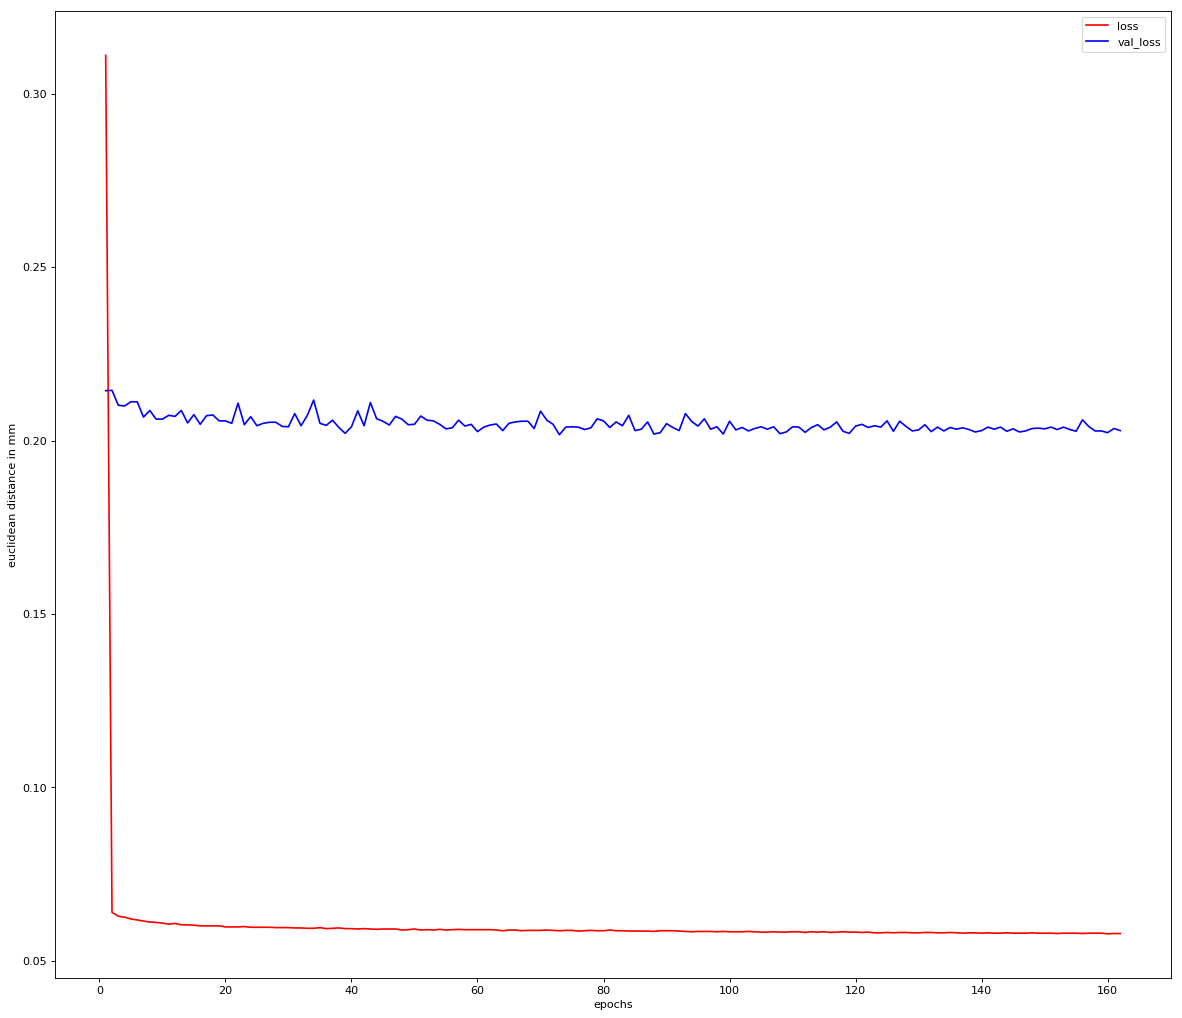

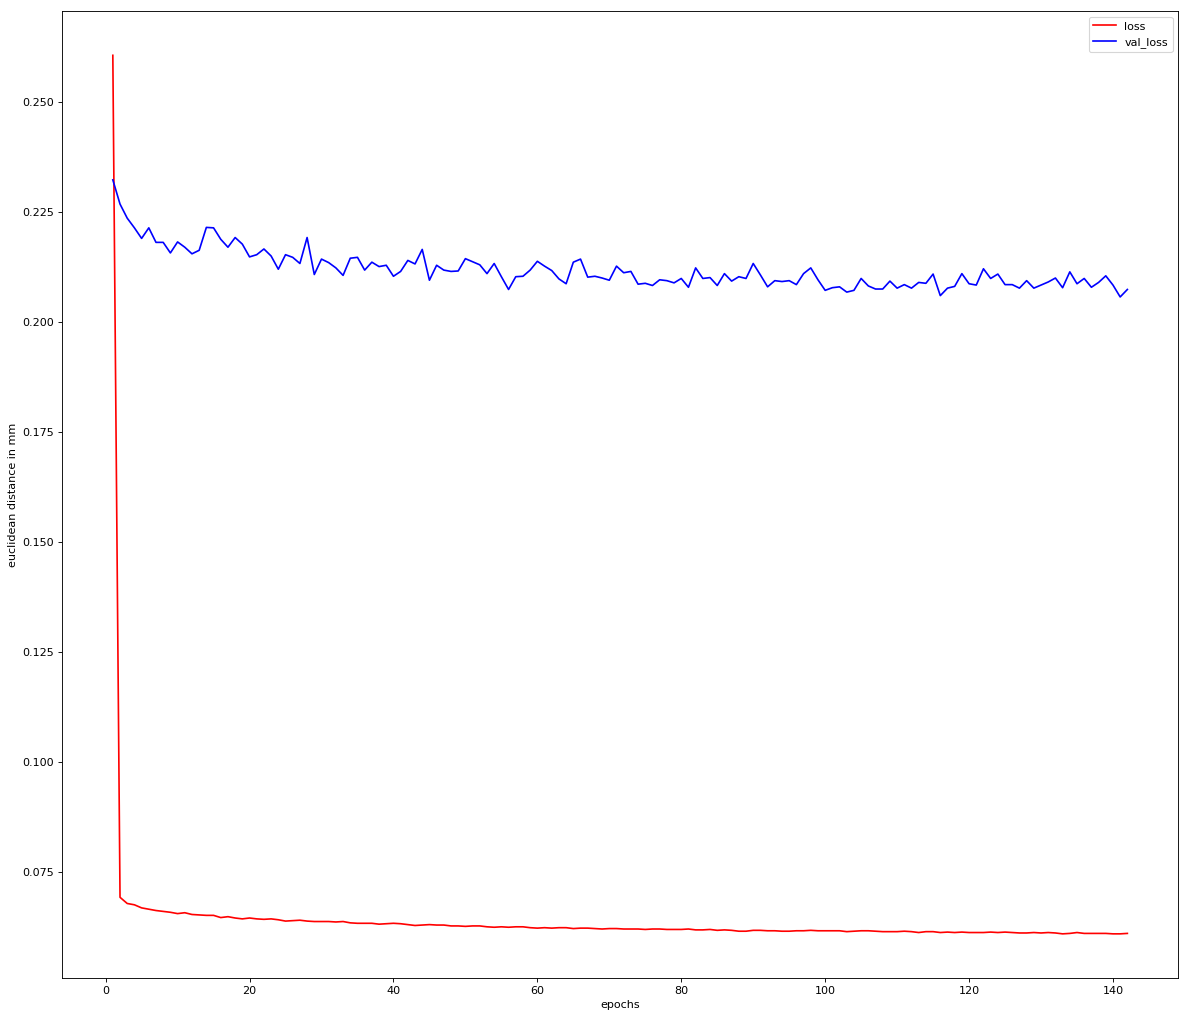

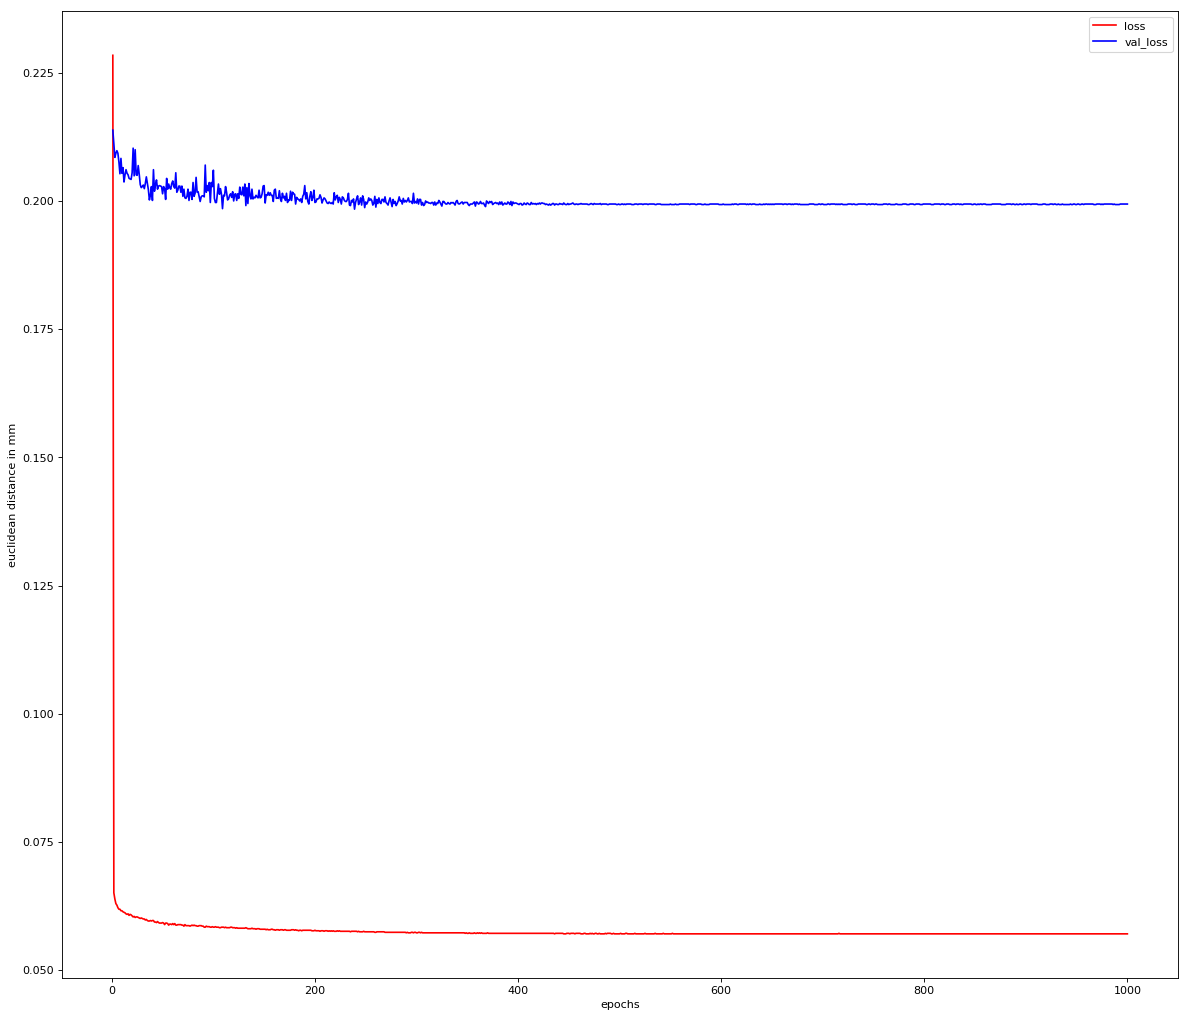

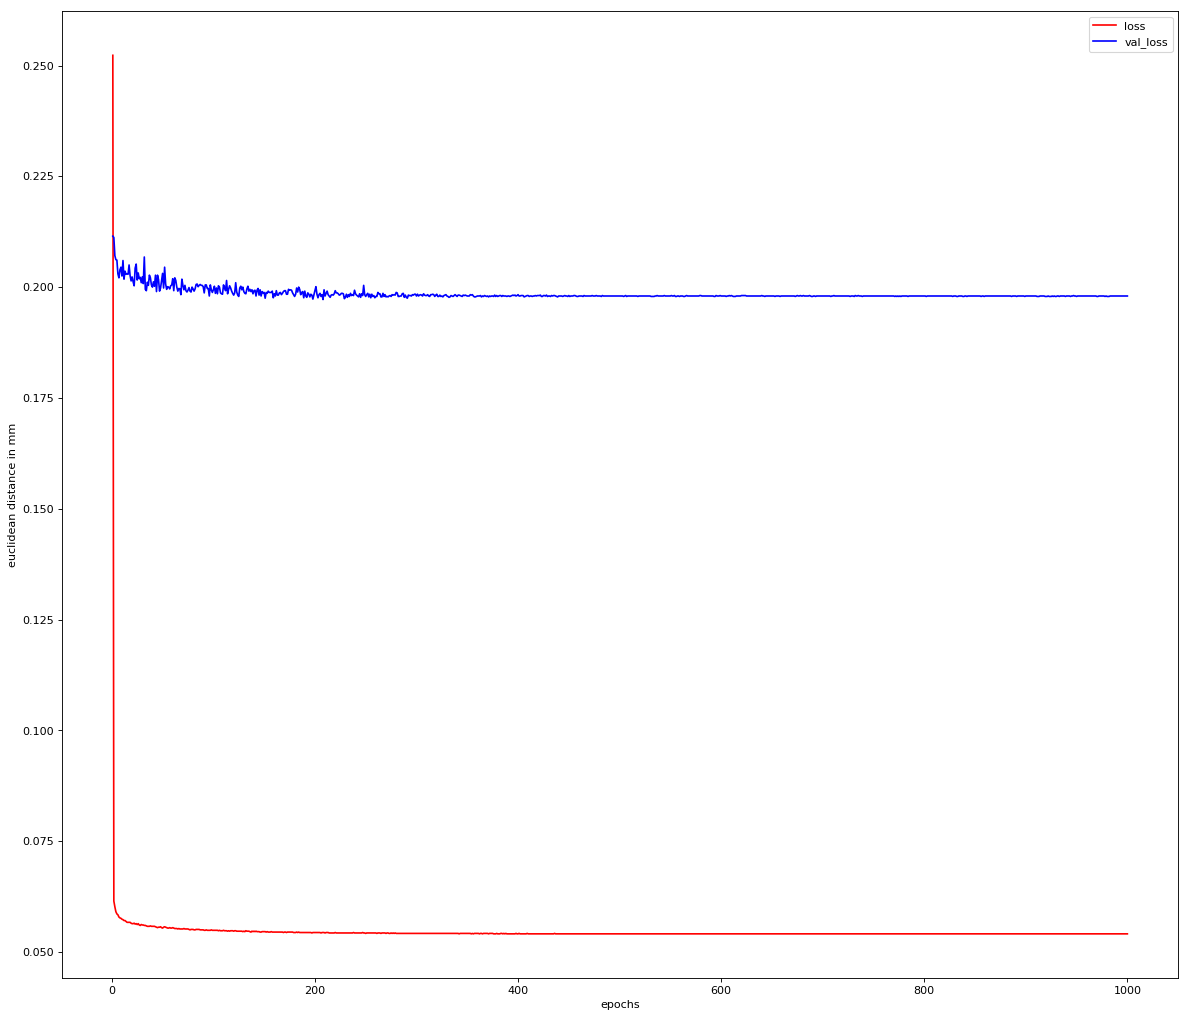

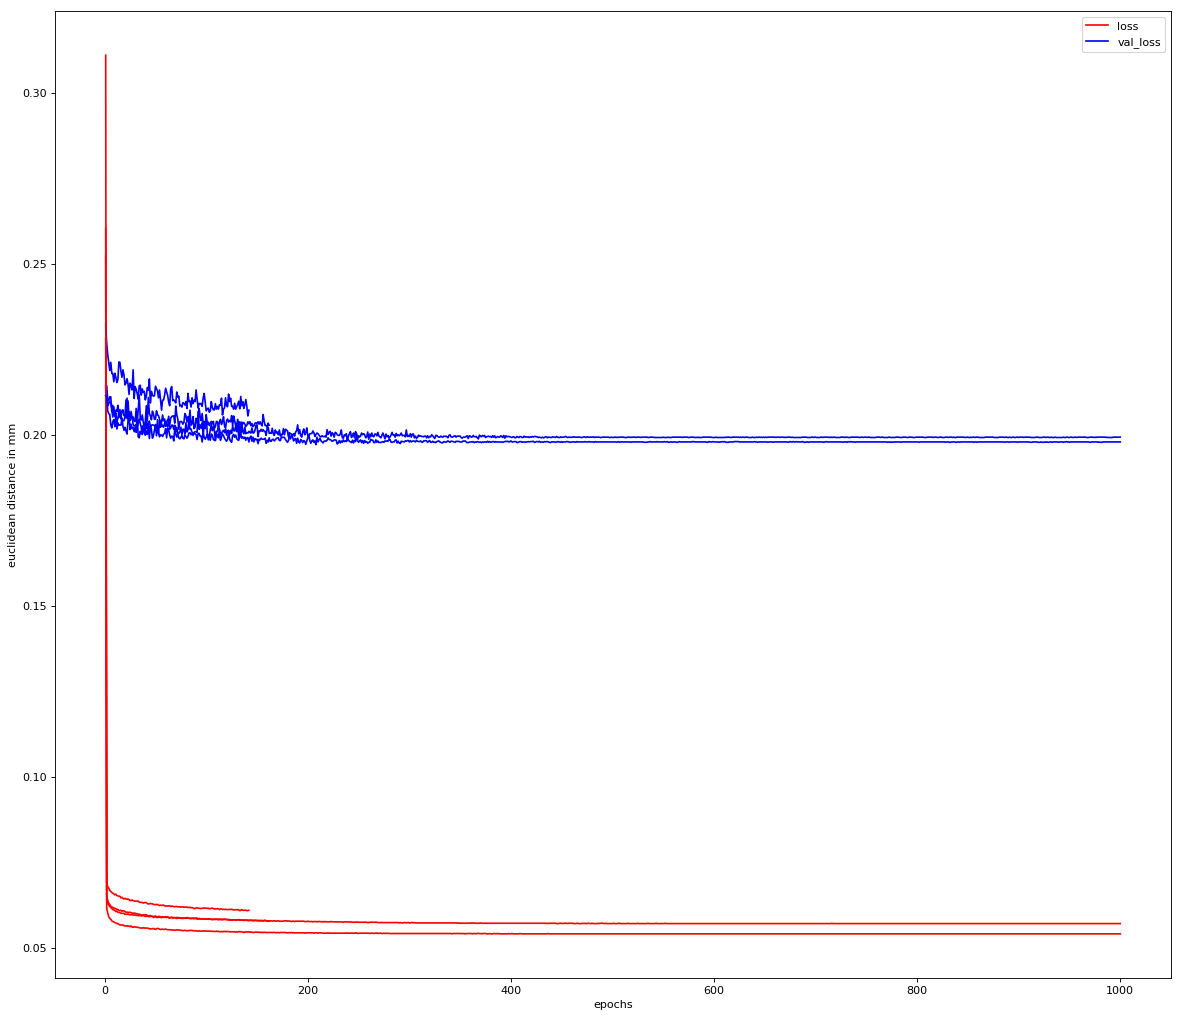

In [3]:
with open('./result.json') as f:
    data = json.load(f)
chats = data["chats"]["list"]
group = ""
for chat in chats:
    if chat["name"] == "IMU-Keras":
        group = chat
        break
messages = group["messages"]

for model in models:
    bot_messages = []
    # ignore first 3 setup messages
    for message in messages[3:]:
        if message["from_id"] == 707020808:
            bot_messages.append(message)

    epoch = []
    loss = []
    val_loss = []
    for message in bot_messages:
        if str(message["text"]).startswith(model):
            tmp = str(message["text"]).split()
            epoch.append(int(float(tmp[3].replace(";", ""))))
            val_loss.append(float(tmp[7].replace(";", "")))
            loss.append(float(tmp[15].replace(";", "")))

    epoch = [x+1 for x in epoch]

    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.plot(epoch, loss, 'r', label='loss')
    plt.plot(epoch, val_loss, 'b', label='val_loss')
    plt.legend(('loss', 'val_loss'), loc='upper right')
    plt.xlabel("epochs")
    plt.ylabel("euclidean distance in mm")
    
    directory = str(Path.home())+"/data/plots/"+ model +"/"
    if not os.path.exists(directory):
        os.makedirs(directory)

    plt.savefig(directory + "curve_"+model+ ".png")
    plt.savefig(directory + "curve_"+model+ ".pdf")
    plt.show()
    

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for model in models:
    bot_messages = []
    # ignore first 3 setup messages
    for message in messages[3:]:
        if message["from_id"] == 707020808:
            bot_messages.append(message)

    epoch = []
    loss = []
    val_loss = []
    for message in bot_messages:
        if str(message["text"]).startswith(model):
            tmp = str(message["text"]).split()
            epoch.append(int(float(tmp[3].replace(";", ""))))
            val_loss.append(float(tmp[7].replace(";", "")))
            loss.append(float(tmp[15].replace(";", "")))

    epoch = [x+1 for x in epoch]

    plt.plot(epoch, loss, 'r', label='loss')
    plt.plot(epoch, val_loss, 'b', label='val_loss')
plt.legend(('loss', 'val_loss'), loc='upper right')
plt.xlabel("epochs")
plt.ylabel("euclidean distance in mm")

plt.savefig(str(Path.home()) + "/data/plots/general.png")
plt.savefig(str(Path.home()) + "/data/plots/general.pdf")
plt.show()